<a href="https://colab.research.google.com/github/wkweigel/NotebookExamples/blob/main/RunningReactions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook Setup

In [1]:
!pip install rdkit tqdm mols2grid useful_rdkit_utils

import sys

#Clone main repository into colab
!git clone https://github.com/wkweigel/NotebookExamples.git

#Add the main directory to the path
main_dir = '/content/NotebookExamples'
sys.path.insert(0,f'{main_dir}/')

from Modules.Reactions import *

['Collecting rdkit',
 '  Downloading rdkit-2024.3.6-cp310-cp310-manylinux_2_28_x86_64.whl.metadata (4.0 kB)',
 'Requirement already satisfied: tqdm in /usr/local/lib/python3.10/dist-packages (4.66.6)',
 'Collecting mols2grid',
 '  Downloading mols2grid-2.0.0-py3-none-any.whl.metadata (16 kB)',
 'Collecting useful_rdkit_utils',
 '  Downloading useful_rdkit_utils-0.3.12-py3-none-any.whl.metadata (2.0 kB)',
 'Requirement already satisfied: numpy in /usr/local/lib/python3.10/dist-packages (from rdkit) (1.26.4)',
 'Requirement already satisfied: Pillow in /usr/local/lib/python3.10/dist-packages (from rdkit) (11.0.0)',
 'Requirement already satisfied: ipywidgets<8,>=7 in /usr/local/lib/python3.10/dist-packages (from mols2grid) (7.7.1)',
 'Requirement already satisfied: jinja2>=2.11.0 in /usr/local/lib/python3.10/dist-packages (from mols2grid) (3.1.4)',
 'Requirement already satisfied: pandas in /usr/local/lib/python3.10/dist-packages (from mols2grid) (2.2.2)',
 'Requirement already satisfied

# Define Reactants
The reactant class is used for each compound.
  * For each compound, the structure is specified with SMILES along with the  intended reactivity type(s)
  * Possible acceptable reagets are:
        'alkyl_amine',
        'aryl_amine',
        'boc_amine',
        'fmoc_amine',
        'alkyl_alcohol',
        'aryl_alcohol',
        'alkyl_halide',
        'aryl_halide',
        'aldehyde',
        'ketone',
        'alkyne',
        'carboxylic_acid',
        'boronic_acid',
        'boronic_ester',
        'vinyl_alkene',
        'azide'


In [3]:
#Define reagents using the Reactant class
alkyl_amine=Reactant('NCC(C1=CC=NC1=O)C2=CC=CC=C2', 'alkyl_amine')
azide = Reactant('O=C1N=CC=C1C(C2=CC=CC=C2)CN=[N+]=[N-]', 'azide')
alkyl_bromide=Reactant('O=C(C1CC1)CBr', 'alkyl_halide')
aryl_bromide=Reactant('BrC(C=C1)=CN=C1C2=CC=CC=N2', 'aryl_halide')
aryl_iodide=Reactant('IC1=CC=CC=C1', 'aryl_halide')
alkyl_alcohol=Reactant('O=C(C1=CC=CC=C1)CCO', 'alkyl_alcohol')
boc=Reactant('OC(OC(C)(C)C)=O', 'carboxylic_acid')
boronic_acid=Reactant('COC1=CC(OC)=CC(B(O)O)=C1', 'boronic_acid')
aldehyde=Reactant('O=CC1=CC=C(C2=CC=CS2)N=C1', 'aldehyde')
styrene=Reactant('C=CC1=CC(C(C)=O)=CC(C(F)(F)F)=C1', 'vinyl_alkene')
aryl_alkyne=Reactant('C#CC1=CN=CN=C1', 'alkyne')
alkyl_alkyne=Reactant('CC(C)C#C', 'alkyne')
ketone=Reactant('O=C(C1=CC=CO1)CN2CCOCC2', 'ketone')

#Create a Reactions class instance for running reactions
run_reaction=Reactions()

#Define lists for holding the reaction product info
product_smiles=[]
product_labels=[]

# Perform the reactions

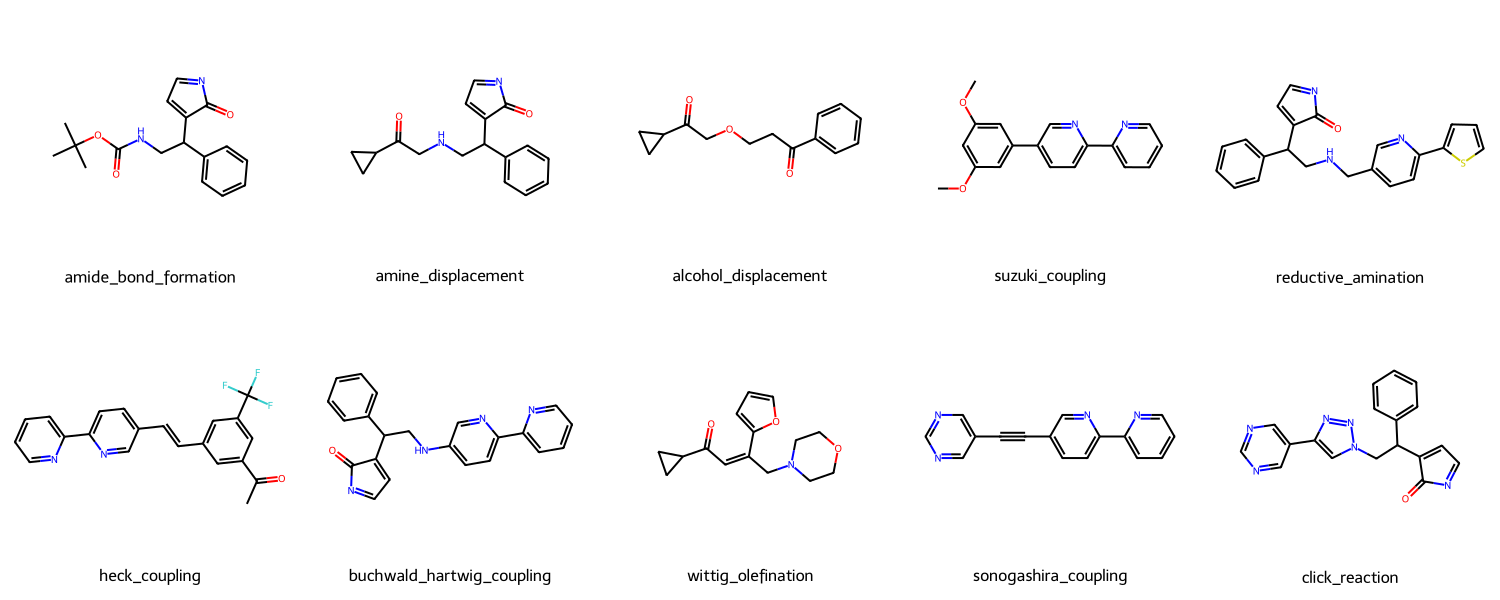

In [4]:

#Run the reactions using the defined reagents
product_smiles.append(run_reaction.amide_bond_formation(alkyl_amine,boc))
product_labels.append('amide_bond_formation')

product_smiles.append(run_reaction.amine_displacement(alkyl_amine,alkyl_bromide))
product_labels.append('amine_displacement')

product_smiles.append(run_reaction.alcohol_displacement(alkyl_alcohol,alkyl_bromide))
product_labels.append('alcohol_displacement')

product_smiles.append(run_reaction.suzuki_coupling(boronic_acid,aryl_bromide))
product_labels.append('suzuki_coupling')

product_smiles.append(run_reaction.reductive_amination(aldehyde,alkyl_amine))
product_labels.append('reductive_amination')

product_smiles.append(run_reaction.heck_coupling(styrene,aryl_bromide))
product_labels.append('heck_coupling')

product_smiles.append(run_reaction.buchwald_hartwig_coupling(alkyl_amine,aryl_bromide))
product_labels.append('buchwald_hartwig_coupling')

product_smiles.append(run_reaction.wittig_olefination(ketone,alkyl_bromide))
product_labels.append('wittig_olefination')

product_smiles.append(run_reaction.sonogashira_coupling(aryl_alkyne,aryl_bromide))
product_labels.append('sonogashira_coupling')

product_smiles.append(run_reaction.click_reaction(aryl_alkyne,azide))
product_labels.append('click_reaction')

#Display the reaction products
mol_list=[]
for smi in product_smiles:
    mol_list.append(Chem.MolFromSmiles(smi))

Draw.MolsToGridImage(mol_list, legends=product_labels, molsPerRow=5, subImgSize=(300,300))